In [132]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy import signal
import math

Problem 1

In [35]:
def SSIM(img1,img2):
    k = [0.001, 0.002]
    l = 1
    kernel=cv2.getGaussianKernel(11, 1.5)
    window=np.matmul(kernel,kernel.T)
     
    C1 = (k[0]*l)**2
    C2 = (k[1]*l)**2
     
    mu1 = signal.convolve2d(img1, window, 'same')
    mu2 = signal.convolve2d(img2, window, 'same')
    
    X_mu=(img1-mu1)
    Y_mu=(img2-mu2)
    sigma2X = signal.convolve2d(X_mu**2, window, 'same')
    sigma2Y = signal.convolve2d(Y_mu**2, window, 'same')
    sigma2XY = signal.convolve2d(X_mu*Y_mu, window, 'same') 
   
    ssim_map = ((2*mu1*mu2 + C1)*(2*sigma2XY + C2))/((mu1**2 + mu2**2 + C1)*(sigma2X + sigma2Y + C2))
    ssim = np.mean(ssim_map)
    return ssim,ssim_map

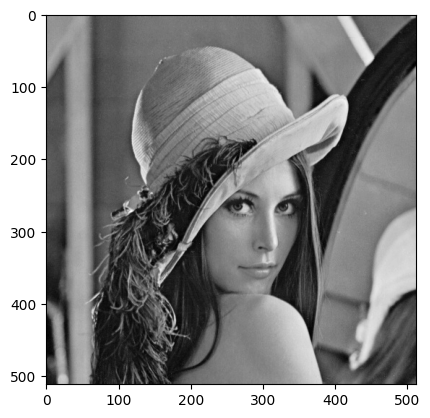

In [47]:
image1=mpimg.imread("D:\Akanksha\IIT Mandi\Sem2\Digital Image Processing\lena.jpg")
image1=image1[:,:,2]
image1=image1/255
plt.imshow(image1,cmap="gray")

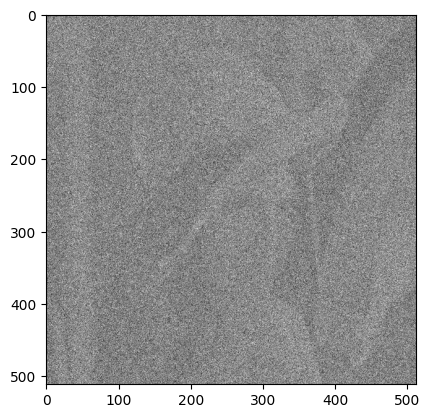

In [49]:
noise=np.random.normal(size=np.shape(image1))
image2=image1+noise
plt.imshow(image2,cmap="gray")

SSIM for noisy image as reference is 0.002089957036460131


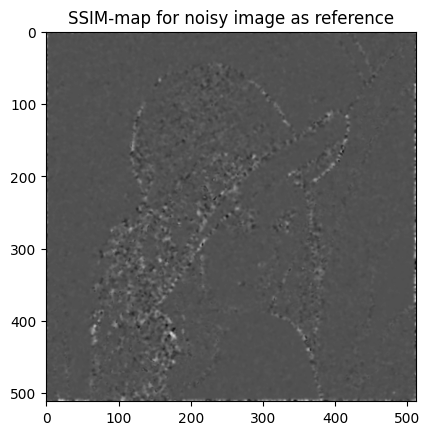

In [51]:
ssim1,ssim_map1=SSIM(image1,image2)
print(f"SSIM for noisy image as reference is {ssim1}")
plt.title("SSIM-map for noisy image as reference")
plt.imshow(ssim_map1,cmap="gray")

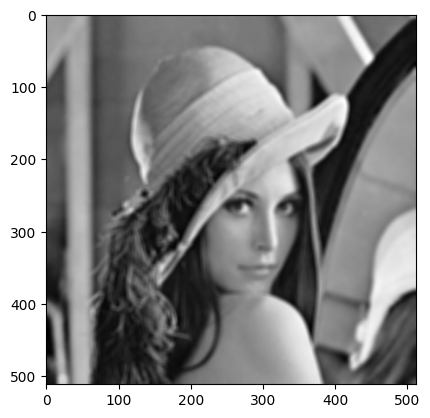

In [53]:
image3=cv2.blur(image1,(7,7))
plt.imshow(image3,cmap="gray")

SSIM for blurr image as reference is 0.2061092886445352


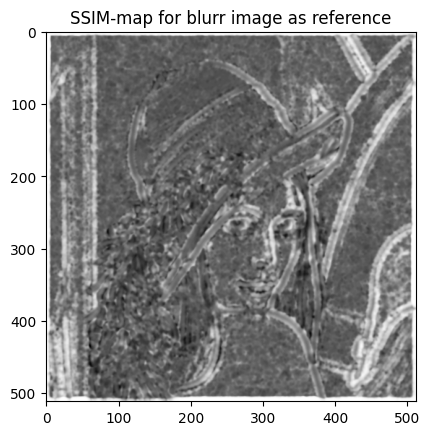

In [55]:
ssim2,ssim_map2=SSIM(image1,image3)
print(f"SSIM for blurr image as reference is {ssim2}")
plt.title("SSIM-map for blurr image as reference")
plt.imshow(ssim_map2,cmap="gray")

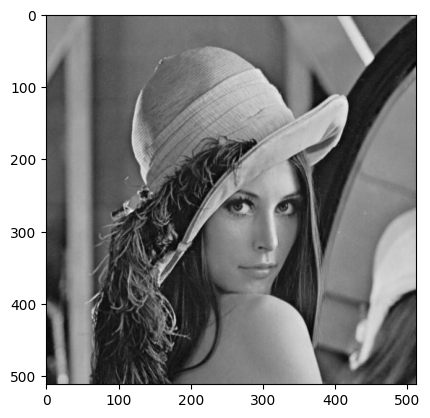

In [58]:
image4=mpimg.imread("D:\Akanksha\IIT Mandi\Sem2\Digital Image Processing\lena_compressed.jpg")
image4=image4[:,:,2]
image4=image4/255
plt.imshow(image4,cmap="gray")

SSIM for compress image as reference is 0.6948423188986772


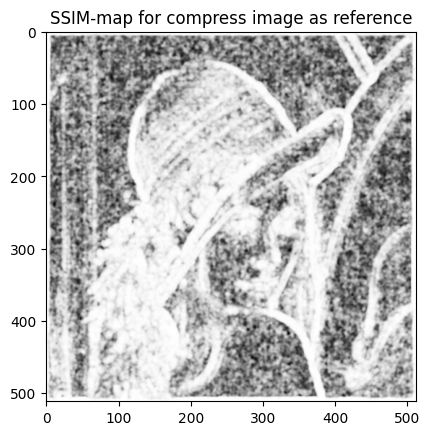

In [59]:
ssim3,ssim_map3=SSIM(image1,image4)
print(f"SSIM for compress image as reference is {ssim3}")
plt.title("SSIM-map for compress image as reference")
plt.imshow(ssim_map3,cmap="gray")

Problem 2

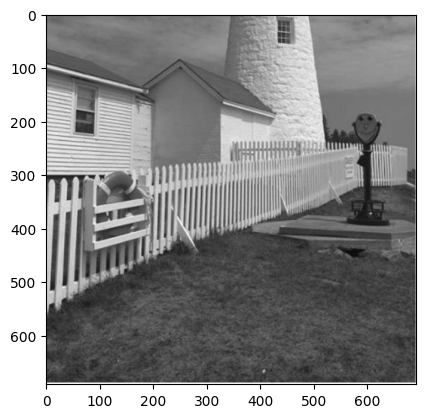

In [207]:
IMG=mpimg.imread("D:\Akanksha\IIT Mandi\Sem2\Digital Image Processing\lighthouse.png")
IMG=np.int_(IMG[:,:,:3]*255)
plt.imshow(IMG,cmap="gray")

In [209]:
def find_harris_corners(input_img, k, window_size, threshold):
    
    corner_list = []
    output_img = input_img.copy()#cv2.cvtColor(input_img.copy(), cv2.COLOR_GRAY2RGB)
    input_img=input_img[:,:,0]
    offset = int(window_size/2)
    y_range = input_img.shape[0] - offset
    x_range = input_img.shape[1] - offset
    
    
    dy, dx = np.gradient(input_img)
    Ixx = dx**2
    Ixy = dy*dx
    Iyy = dy**2
    
    
    for y in range(offset, y_range):
        for x in range(offset, x_range):
            
         
            start_y = y - offset
            end_y = y + offset + 1
            start_x = x - offset
            end_x = x + offset + 1
            
           
            windowIxx = Ixx[start_y : end_y, start_x : end_x]
            windowIxy = Ixy[start_y : end_y, start_x : end_x]
            windowIyy = Iyy[start_y : end_y, start_x : end_x]
            
            Sxx = windowIxx.sum()
            Sxy = windowIxy.sum()
            Syy = windowIyy.sum()

            det = (Sxx * Syy) - (Sxy**2)
            trace = Sxx + Syy
            
            r = det - k*(trace**2)

            if r > threshold:
                corner_list.append([x, y, r])
                output_img[y,x] = (0,0,255)
    
    return corner_list, output_img 

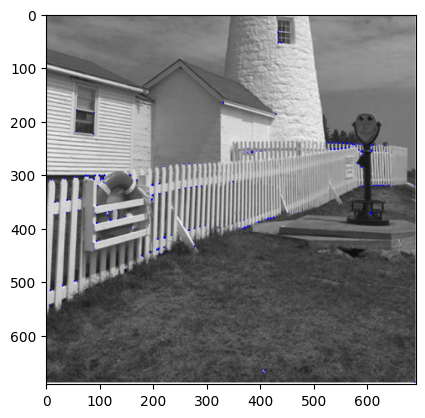

In [210]:
corner_list, output_img =find_harris_corners(IMG, 0.04, 3, 10000000)
plt.imshow(output_img)

Problem 3

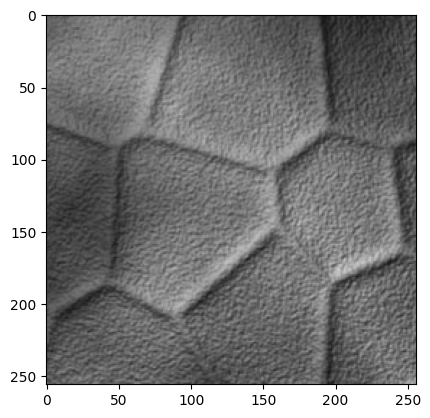

In [128]:
lineIMG=mpimg.imread("D:\Akanksha\IIT Mandi\Sem2\Digital Image Processing\Tesselation - Copy.tif")
plt.imshow(lineIMG)

In [129]:
gray = cv2.cvtColor(lineIMG, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 50, 150, apertureSize=3)

In [130]:
cedges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
cedges = np.copy(cedges)
  
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150, None, 0, 0)

In [133]:
if lines is not None:
  for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    #print(pt1,pt2)
    cv2.line(cedges, pt1, pt2, (0,0,255), 3)

cv2.imwrite('linesDetected.jpg', cedges)


True

lines detected on the image


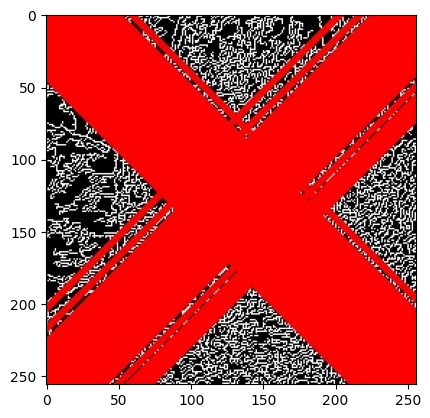

In [135]:
print("lines detected on the image")
opLinImg=mpimg.imread("linesDetected.jpg")
plt.imshow(opLinImg)

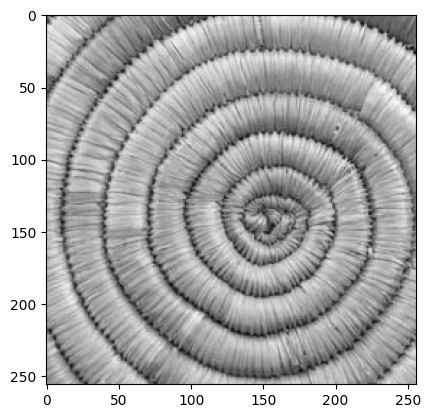

In [187]:
circleIMG=mpimg.imread("D:\Akanksha\IIT Mandi\Sem2\Digital Image Processing\Spiral - Copy.tif")
circleIMG=circleIMG[:,:,0]
plt.imshow(circleIMG,cmap="gray")

In [194]:
rows = circleIMG.shape[0]
circles = cv2.HoughCircles(circleIMG, cv2.HOUGH_GRADIENT, 1,5,
                               param1=20, param2=40,
                               minRadius=1, maxRadius=20)
    
    
if circles is not None:
  circles = np.uint16(np.around(circles))
  for i in circles[0, :]:
      center = (i[0], i[1])
            # circle center
      cv2.circle(circleIMG, center, 2, (0, 100, 100), 3)
            # circle outline
      radius = i[2]
      cv2.circle(circleIMG, center, radius, (237, 0, 255), 3)

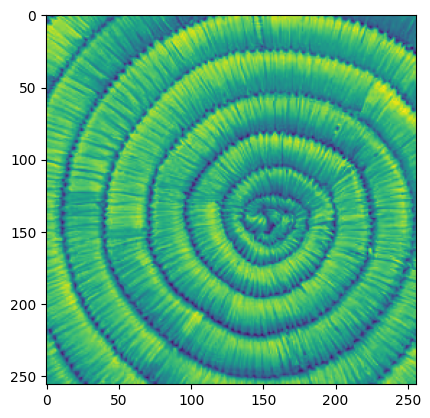

In [195]:
plt.imshow(circleIMG)

Problem 4

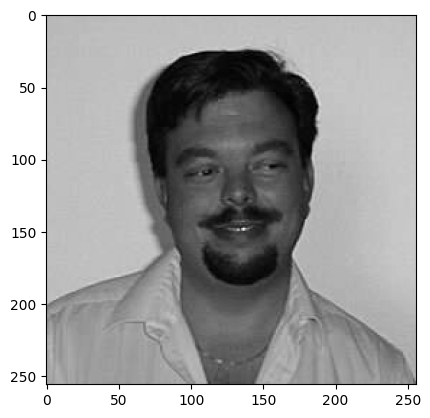

In [91]:
image5=mpimg.imread("D:\Akanksha\IIT Mandi\Sem2\Digital Image Processing\Tyrone - Copy.tif")
plt.imshow(image5,cmap="gray")

In [92]:
pix=np.unique(image5)
m,n=np.shape(image5)
thresh=np.sum(image5)/(m*n)
# print(thresh)

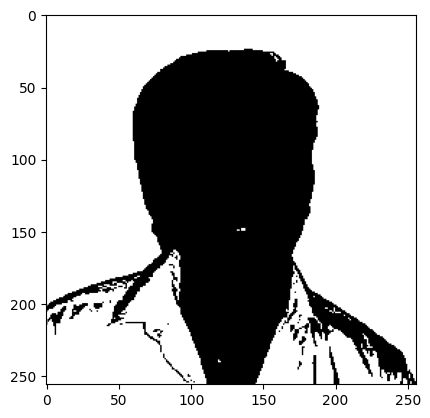

In [93]:
I=np.ones(np.shape(image5))
for i in range(np.shape(image5)[0]):
    for j in range(np.shape(image5)[1]):
        if image5[i][j]<thresh:
            I[i][j]=0
plt.imshow(I,cmap="gray")

In [94]:
def connectedComp(I):
    R=np.zeros(np.shape(I))
    k=1
    for i in range(1,m-1):
        for j in range(1,n-1):
            if I[i][j]==0 and I[i][j-1]==1 and I[i-1][j]==1:
                R[i][j]=k
                k+=1
            else:
                if I[i][j]==0 and I[i][j-1]==1 and I[i-1][j]==0:
                    R[i][j]=R[i-1][j]
                else: 
                    if I[i][j]==0 and I[i][j-1]==0 and I[i-1][j]==1:
                        R[i][j]=R[i][j-1]
                    else:
                        if I[i][j]==0 and I[i][j-1]==0 and I[i-1][j]==0:
                            R[i][j]=min(R[i][j-1],R[i-1][j])
    return R

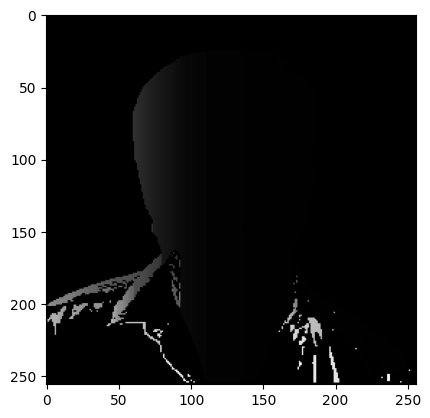

In [97]:
R=connectedComp(I)
plt.imshow(R,cmap="gray")

In [98]:
def connected_components_label(img):
    label = np.zeros(np.shape(img), dtype=np.uint16)
    l= 1
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i, j] == 1:
                neigh = []
                if i > 0:
                    if j > 0 and label[i-1, j-1] > 0:
                        neigh.append(label[i-1, j-1])
                    if label[i-1, j] > 0:
                        neigh.append(label[i-1, j])
                    if j < img.shape[1]-1 and label[i-1, j+1] > 0:
                        neigh.append(label[i-1, j+1])
                if j > 0 and label[i, j-1] > 0:
                    neigh.append(label[i, j-1])
                
                if not neigh:
                    label[i, j] = l
                    l += 1
                else:
                    label[i, j] = min(neigh)
                    for n in neigh:
                        if n != label[i, j]:
                            label[label == n] = label[i, j]
    return label

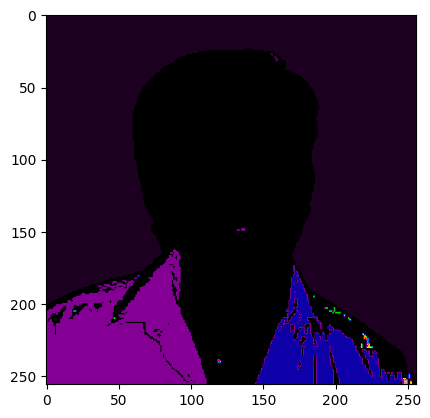

In [99]:
labels=connected_components_label(I)
plt.imshow(labels,cmap="nipy_spectral")

In [100]:
labels

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [7, 7, 7, ..., 0, 0, 1],
       [7, 7, 7, ..., 0, 0, 0],
       [7, 7, 7, ..., 0, 0, 0]], dtype=uint16)